### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.float_format = '{:.6f}'.format

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve, precision_score, recall_score, f1_score, cohen_kappa_score

In [50]:
from sklearn.linear_model import Lasso

In [6]:
df = pd.read_csv('Processed_file.csv')
df.head()

,Unnamed: 0,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,SEAPOR503,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,No
1,1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,PITHOM412,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional,Yes
2,2,3000014,0,38.000000,8.000000,38.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.300000,0.000000,1.300000,3.700000,0.000000,0.000000,0.000000,60,1,1,MILMIL414,1.000000,1.000000,1812.000000,26.000000,26.000000,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,No,3-Good,Town,Crafts,Yes
3,3,3000022,0,82.280000,1312.000000,75.000000,1.240000,0.000000,0.000000,157.000000,8.100000,52.000000,7.700000,76.000000,4.300000,1.300000,200.300000,370.300000,147.000000,555.700000,303.700000,59.700000,0.000000,22.700000,59,2,2,PITHOM412,9.000000,4.000000,458.000000,30.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,No,4-Medium,Other,Other,No
4,4,3000026,1,17.140000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53,2,2,OKCTUL918,4.000000,3.000000,852.000000,46.000000,54.000000,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,No,1-Highest,Other,Professional,Yes


In [7]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df.head(2)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,SEAPOR503,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,No
1,3000010,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,PITHOM412,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional,Yes


In [9]:
# Lets drop CustomerID and SeriveArea.

In [11]:
df.drop(['CustomerID', 'ServiceArea'], axis = 1, inplace = True)

In [12]:
df.head(2)

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,No
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,No,4-Medium,Suburban,Professional,Yes


- In the previous example, we built ML models on the complete data that we have, but we got very poor results. 
- Now lets use only the columns which are important for the analysis.
- Basically we will be perform Variable selection using the following three:
    - Lasso
    - KNN
    - Correlation

In [13]:
df_num = df.select_dtypes(include=[np.number])
df_num.head(2)

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,1,24.000000,219.000000,22.000000,0.250000,0.000000,0.000000,-157.000000,-19.000000,0.700000,0.700000,6.300000,0.000000,0.000000,97.200000,0.000000,0.000000,58.000000,24.000000,1.300000,0.000000,0.300000,61,2,1,2.000000,2.000000,361.000000,62.000000,0.000000,1,0,0,4,0
1,1,16.990000,10.000000,17.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.300000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.300000,0.000000,0.000000,58,1,1,2.000000,1.000000,1504.000000,40.000000,42.000000,0,0,0,5,0


In [14]:
df_num.drop('Churn', axis = 1, inplace = True)

In [15]:
df_cat = df.select_dtypes(include='O')
df_cat.head(2)

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,Yes,1-Highest,Suburban,Professional,No
1,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,4-Medium,Suburban,Professional,Yes


In [16]:
dummy = pd.get_dummies(df_cat, drop_first= True)

In [17]:
dummy.head(2)

,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,NotNewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [18]:
#All the categorical variables have been encoded.

In [21]:
#lets scale the data for the numerical data.
#Lets use the StandardScaler.

X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

df_num_scaled.head(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
0,-0.783096,-0.578622,-1.042504,-0.289052,-0.413790,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,-0.565621,-0.366752,-0.255797,-0.105716,-0.720778,-0.490714,-0.310154,-0.470619,-0.569459,-0.020663,-0.275825,4.310567,0.382421,-0.524583,0.146016,0.487086,-0.077010,1.395945,-0.869616,4.662897,-0.128300,-0.169283,-0.103411,-0.140707
1,-0.940828,-0.973610,-1.252478,-0.401392,-0.413790,-0.125718,0.029233,0.030066,-0.631532,-0.373230,-0.658224,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.815173,-0.718593,-0.633746,-0.020663,-0.329540,4.004446,-0.434992,-0.524583,0.146016,-0.616767,4.426588,0.391631,0.889077,-0.180167,-0.128300,-0.169283,0.215243,-0.140707


In [23]:
# Concating the scaled values and the dummy variables.
X = pd.concat([df_num_scaled, dummy], axis =1 )
X.head(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,NotNewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,-0.783096,-0.578622,-1.042504,-0.289052,-0.413790,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,-0.565621,-0.366752,-0.255797,-0.105716,-0.720778,-0.490714,-0.310154,-0.470619,-0.569459,-0.020663,-0.275825,4.310567,0.382421,-0.524583,0.146016,0.487086,-0.077010,1.395945,-0.869616,4.662897,-0.128300,-0.169283,-0.103411,-0.140707,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,-0.940828,-0.973610,-1.252478,-0.401392,-0.413790,-0.125718,0.029233,0.030066,-0.631532,-0.373230,-0.658224,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.815173,-0.718593,-0.633746,-0.020663,-0.329540,4.004446,-0.434992,-0.524583,0.146016,-0.616767,4.426588,0.391631,0.889077,-0.180167,-0.128300,-0.169283,0.215243,-0.140707,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [52]:
X.to_csv("/Users/azharmadanisyed/Downloads/DS Project/Scaled_data.csv")

In [24]:
y = df['Churn']

In [25]:
y[:5]

0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 68)
y_train (40837,)
X_test (10210, 68)
y_test (10210,)


In [33]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.4469


In [28]:
from sklearn.linear_model import Lasso

In [29]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [30]:
def get_test_rmse(model):
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

In [35]:
def plot_coefficients(model, algorithm_name):
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

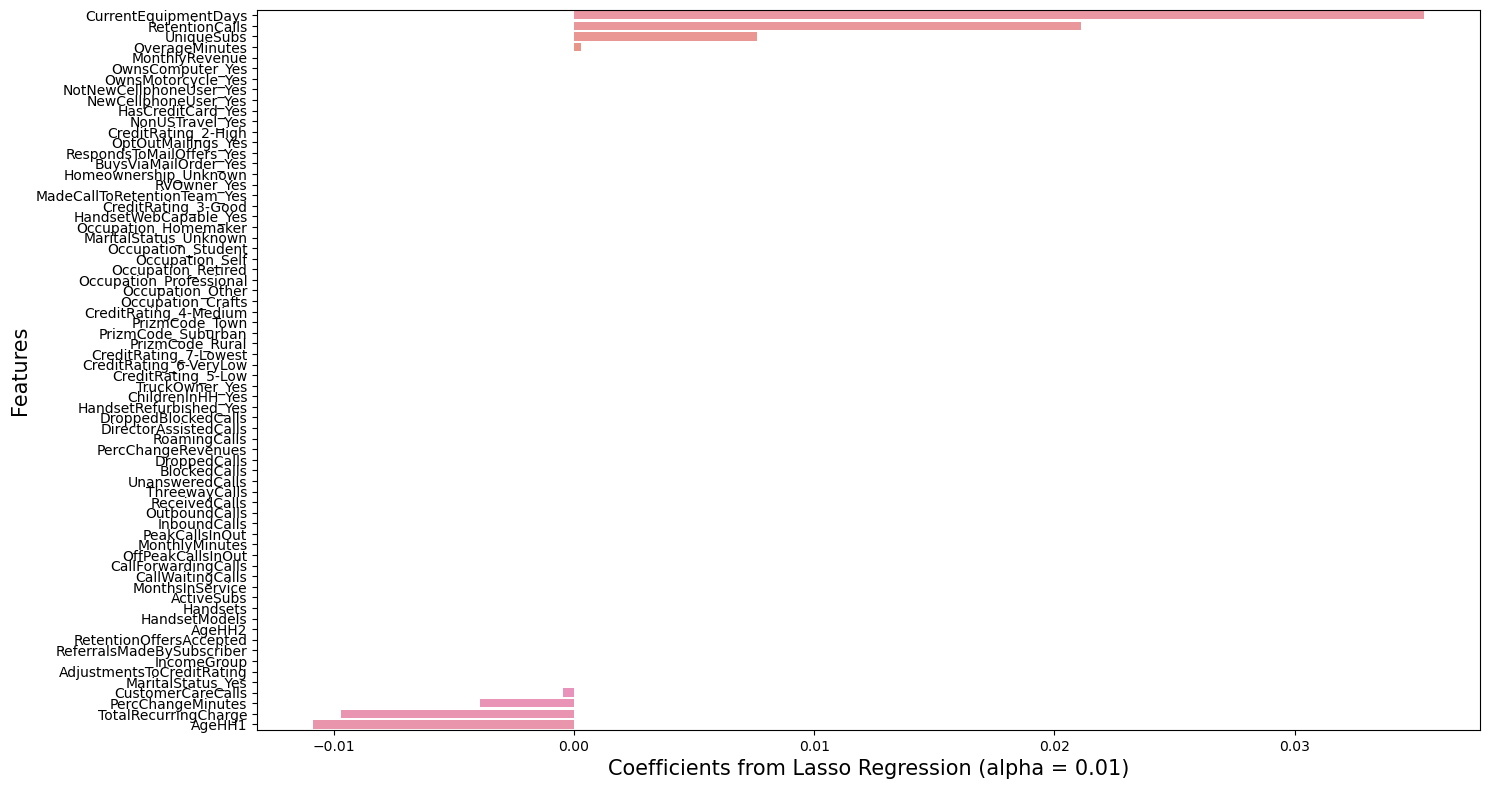

In [37]:
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')
plt.tight_layout()

plt.show()

In [38]:
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['MonthlyRevenue',
 'MonthlyMinutes',
 'DirectorAssistedCalls',
 'RoamingCalls',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'AgeHH2',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating',
 'ChildrenInHH_Yes',
 'HandsetRefurbished_Yes',
 'HandsetWebCapable_Yes',
 'TruckOwner_Yes',
 'RVOwner_Yes',
 'Homeownership_Unknown',
 'BuysViaMailOrder_Yes',
 'RespondsToMailOffers_Yes',
 'OptOutMailings_Yes',
 'NonUSTravel_Yes',
 'OwnsComputer_Yes',
 'HasCreditCard_Yes',
 'NewCellphoneUser_Yes',
 'NotNewCellphoneUser_Yes',
 'OwnsMotorcycle_Yes',
 'MadeCallToRetentionTeam_Yes',
 'CreditRating_2-High',
 'CreditRating_3-Good',
 'CreditRating_4-Medium',
 'CreditRating_5-Low',


In [39]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

# print the variables having the coefficient value equal to zero
# 'to_list()' converts the output to the list type
print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient != 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['TotalRecurringCharge',
 'OverageMinutes',
 'PercChangeMinutes',
 'CustomerCareCalls',
 'UniqueSubs',
 'CurrentEquipmentDays',
 'AgeHH1',
 'RetentionCalls']

In [40]:
# Lets use only these variables to check the accuracy score.

In [41]:
X_new = X[['TotalRecurringCharge',
 'OverageMinutes' ,
 'PercChangeMinutes',
 'CustomerCareCalls',
 'UniqueSubs',
 'CurrentEquipmentDays',
 'AgeHH1',
 'RetentionCalls']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40837, 8)
y_train (40837,)
X_test (10210, 8)
y_test (10210,)


In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
log_reg.score(X_train, y_train)

0.7097974875725445

In [45]:
log_reg.score(X_test, y_test)

0.7135161606268364

In [46]:
def model_train_and_score(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    print("**************************************************")
    print("________"+estimator.__class__.__name__+"__________")
    print()
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {}".format(precision_score(y_test, y_pred, average = 'weighted')))
    print("Recall: {}".format(recall_score(y_test, y_pred, average = 'weighted')))
    print("F1 Score: {}".format(f1_score(y_test, y_pred, average = 'weighted')))
    print()
    print('Classification Report on train data \n',classification_report(y_train,y_pred_train))
    print()
    print('Classification Report on test data \n',classification_report(y_test,y_pred))
    print()
    print("**************************************************") 

In [57]:
model_train_and_score(LogisticRegression(), X_train, y_train, X_test, y_test)

**************************************************
________LogisticRegression__________

Accuracy: 0.7135161606268364
Precision: 0.6336429385845739
Recall: 0.7135161606268364
F1 Score: 0.6068041849406915

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.71      0.99      0.83     29028
           1       0.46      0.02      0.04     11809

    accuracy                           0.71     40837
   macro avg       0.58      0.50      0.43     40837
weighted avg       0.64      0.71      0.60     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.72      0.99      0.83      7308
           1       0.42      0.02      0.04      2902

    accuracy                           0.71     10210
   macro avg       0.57      0.50      0.44     10210
weighted avg       0.63      0.71      0.61     10210


**************************************************


In [58]:
model_train_and_score(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________DecisionTreeClassifier__________

Accuracy: 0.6099902056807052
Precision: 0.6182202096460292
Recall: 0.6099902056807052
F1 Score: 0.6138865162946952

Classification Report on train data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29028
           1       1.00      1.00      1.00     11809

    accuracy                           1.00     40837
   macro avg       1.00      1.00      1.00     40837
weighted avg       1.00      1.00      1.00     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      7308
           1       0.33      0.35      0.34      2902

    accuracy                           0.61     10210
   macro avg       0.53      0.53      0.53     10210
weighted avg       0.62      0.61      0.61     10210


**************************************************


In [59]:
model_train_and_score(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________KNeighborsClassifier__________

Accuracy: 0.6741429970617042
Precision: 0.632657693522245
Recall: 0.6741429970617042
F1 Score: 0.6446322403745244

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85     29028
           1       0.66      0.38      0.49     11809

    accuracy                           0.76     40837
   macro avg       0.72      0.65      0.67     40837
weighted avg       0.75      0.76      0.74     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.85      0.79      7308
           1       0.38      0.22      0.28      2902

    accuracy                           0.67     10210
   macro avg       0.56      0.54      0.53     10210
weighted avg       0.63      0.67      0.64     10210


**************************************************


In [60]:
model_train_and_score(GaussianNB(), X_train, y_train, X_test, y_test)

**************************************************
________GaussianNB__________

Accuracy: 0.6969637610186092
Precision: 0.6215703276568948
Recall: 0.6969637610186092
F1 Score: 0.6258386954996532

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.72      0.94      0.81     29028
           1       0.39      0.10      0.16     11809

    accuracy                           0.69     40837
   macro avg       0.55      0.52      0.49     40837
weighted avg       0.62      0.69      0.62     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.72      0.94      0.82      7308
           1       0.37      0.09      0.15      2902

    accuracy                           0.70     10210
   macro avg       0.55      0.51      0.48     10210
weighted avg       0.62      0.70      0.63     10210


**************************************************


In [61]:
model_train_and_score(RandomForestClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________RandomForestClassifier__________

Accuracy: 0.7041136141038198
Precision: 0.6450269193219834
Recall: 0.7041136141038198
F1 Score: 0.6427354795006905

Classification Report on train data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29028
           1       1.00      1.00      1.00     11809

    accuracy                           1.00     40837
   macro avg       1.00      1.00      1.00     40837
weighted avg       1.00      1.00      1.00     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.73      0.93      0.82      7308
           1       0.43      0.13      0.20      2902

    accuracy                           0.70     10210
   macro avg       0.58      0.53      0.51     10210
weighted avg       0.65      0.70      0.64     10210


**************************************************


In [62]:
model_train_and_score(AdaBoostClassifier(), X_train, y_train, X_test, y_test)

**************************************************
________AdaBoostClassifier__________

Accuracy: 0.7146914789422135
Precision: 0.6520289262872289
Recall: 0.7146914789422135
F1 Score: 0.6172600007253047

Classification Report on train data 
               precision    recall  f1-score   support

           0       0.72      0.98      0.83     29028
           1       0.56      0.05      0.09     11809

    accuracy                           0.71     40837
   macro avg       0.64      0.52      0.46     40837
weighted avg       0.67      0.71      0.62     40837


Classification Report on test data 
               precision    recall  f1-score   support

           0       0.72      0.98      0.83      7308
           1       0.48      0.04      0.08      2902

    accuracy                           0.71     10210
   macro avg       0.60      0.51      0.45     10210
weighted avg       0.65      0.71      0.62     10210


**************************************************


`Inference`: 

    - By using Lasso, we removed most of the insignificant variables. 
    - We used only a few important variables, still the accuracy is less. It's only 70%. 
    - So lets try using others feature selection techniques such as KNN and Correlation and check for which one we are getting the maximum accuracy.

In [54]:
scorecard=pd.DataFrame(columns=['Model','Precision','Recall','F1_score','Train_Accuracy','Test_Accuracy','Kappa_score','RMSE'])
def model_accuracy(model_name,classifier,X_train,y_train,X_test,y_test):
    
    # traing data 
    model=classifier.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    #testing data
    y_test_pred=model.predict(X_test)
    
    Train_accuracy=model.score(X_train,y_train)
    Test_accuracy=model.score(X_test,y_test)
    
    global scorecard
    scorecard=scorecard.append({'Model':model_name
                               ,'Precision':precision_score(y_test,y_test_pred, average = 'weighted')
                               ,'Recall':recall_score(y_test,y_test_pred, average = 'weighted')
                               ,'F1_score':f1_score(y_test,y_test_pred, average = 'weighted')
                               ,'Train_Accuracy':Train_accuracy
                               ,'Test_Accuracy':Test_accuracy
                               ,'Kappa_score':cohen_kappa_score(y_test,y_test_pred),
                               'RMSE':np.sqrt(mean_squared_error(y_test, y_test_pred))},ignore_index=True
                              )

In [55]:
model_accuracy('Random Forest', RandomForestClassifier(), X_train, y_train, X_test, y_test)

In [56]:
scorecard

,Model,Precision,Recall,F1_score,Train_Accuracy,Test_Accuracy,Kappa_score,RMSE
0,Random Forest,0.643916,0.703232,0.642560,0.999951,0.703232,0.078168,0.544764


In [63]:
model_accuracy('Decision Tree', DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

In [64]:
model_accuracy('KNN', KNeighborsClassifier(), X_train, y_train, X_test, y_test)

In [65]:
model_accuracy('Naive Bayes', GaussianNB(), X_train, y_train, X_test, y_test)

In [66]:
model_accuracy('Logistic Regression', LogisticRegression(), X_train, y_train, X_test, y_test)

In [67]:
model_accuracy('Adaboost Classifier', AdaBoostClassifier(), X_train, y_train, X_test, y_test)

In [69]:
scorecard

,Model,Precision,Recall,F1_score,Train_Accuracy,Test_Accuracy,Kappa_score,RMSE
0,Random Forest,0.643916,0.703232,0.642560,0.999951,0.703232,0.078168,0.544764
1,Decision Tree,0.617146,0.609500,0.613136,0.999951,0.609500,0.058948,0.624900
2,KNN,0.632658,0.674143,0.644632,0.763940,0.674143,0.086946,0.570839
3,Naive Bayes,0.621570,0.696964,0.625839,0.694762,0.696964,0.037983,0.550487
4,Logistic Regression,0.633643,0.713516,0.606804,0.709797,0.713516,0.013636,0.535242
5,Adaboost Classifier,0.652029,0.714691,0.617260,0.713716,0.714691,0.033436,0.534143


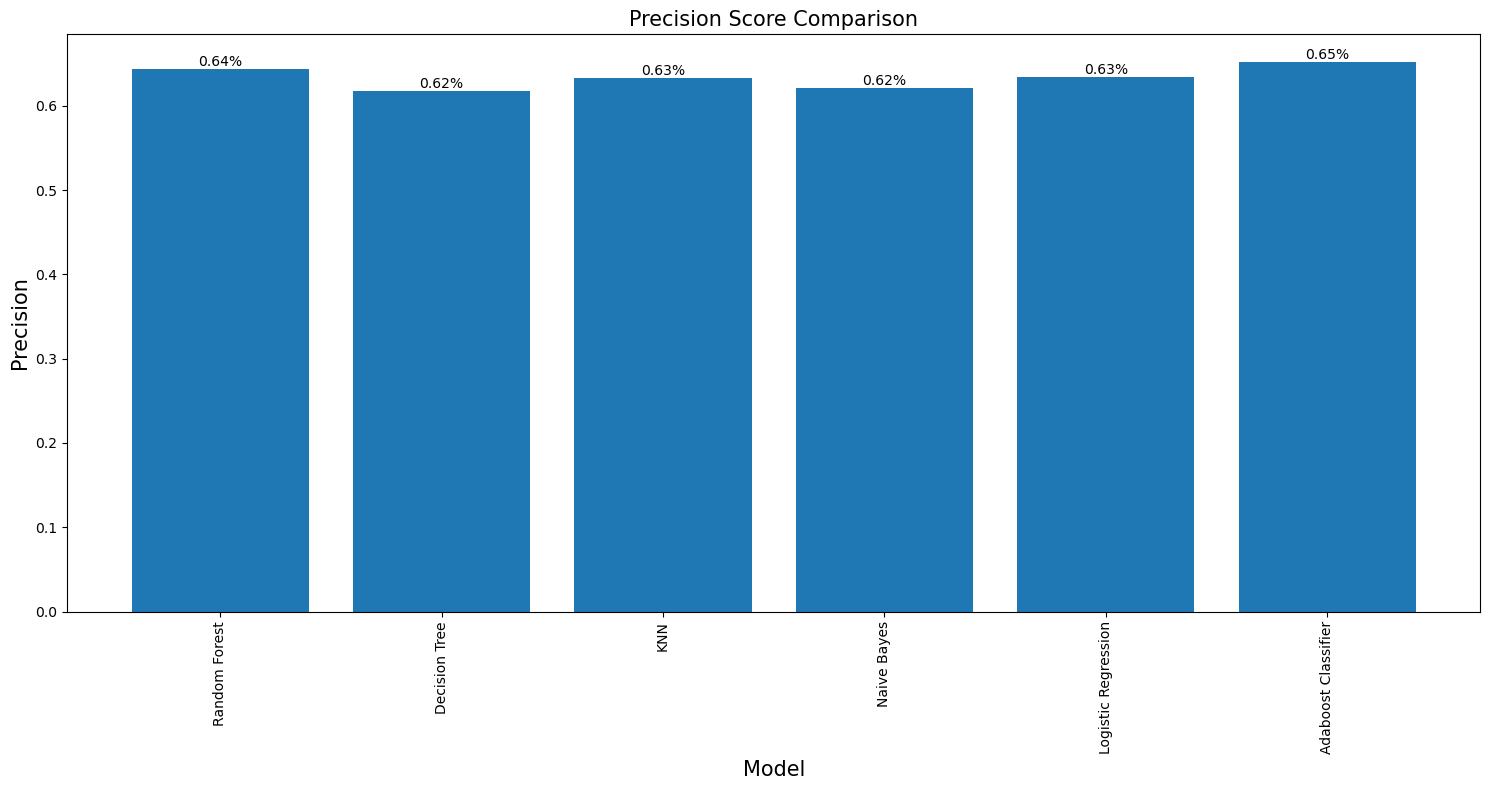

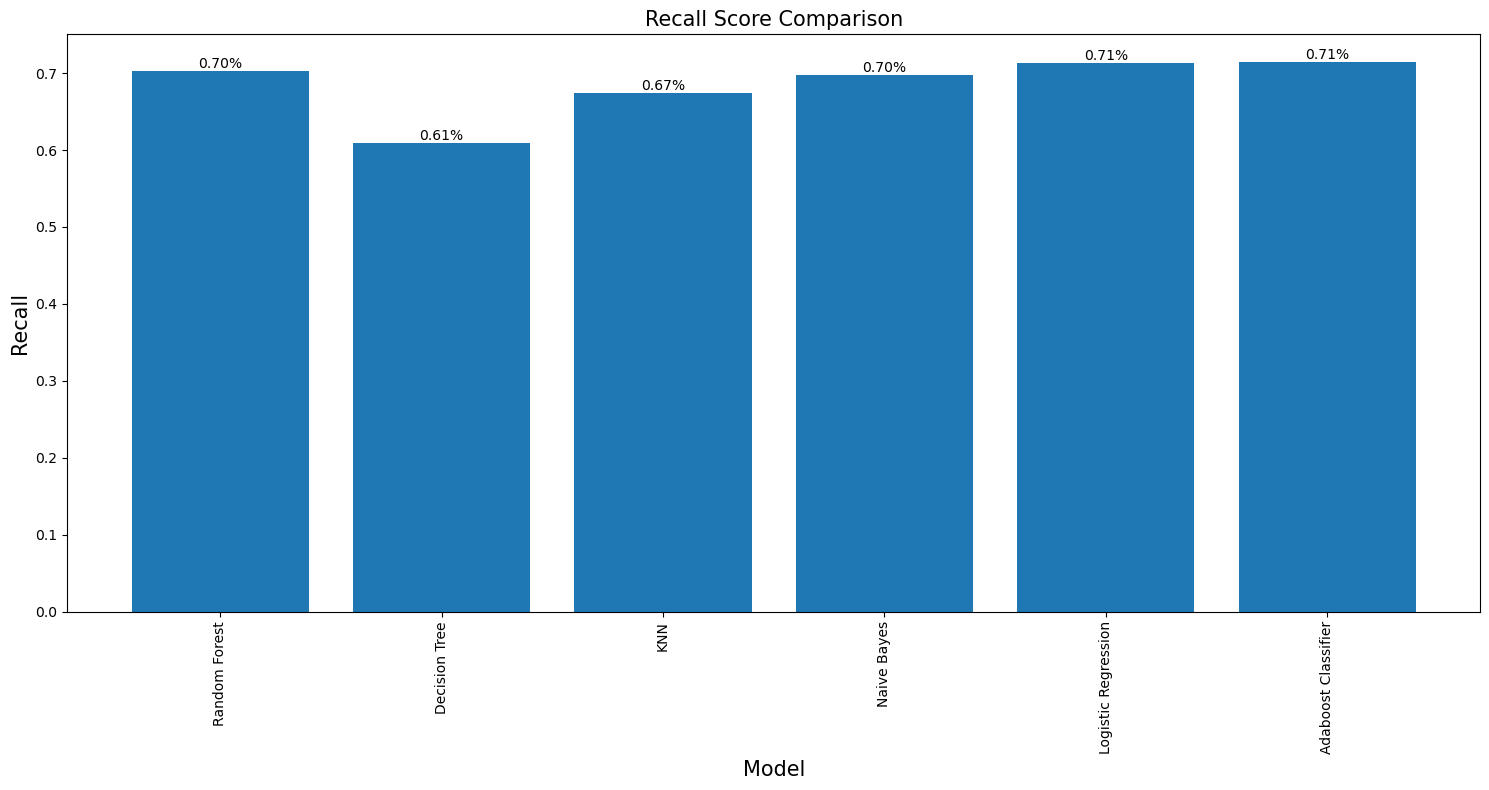

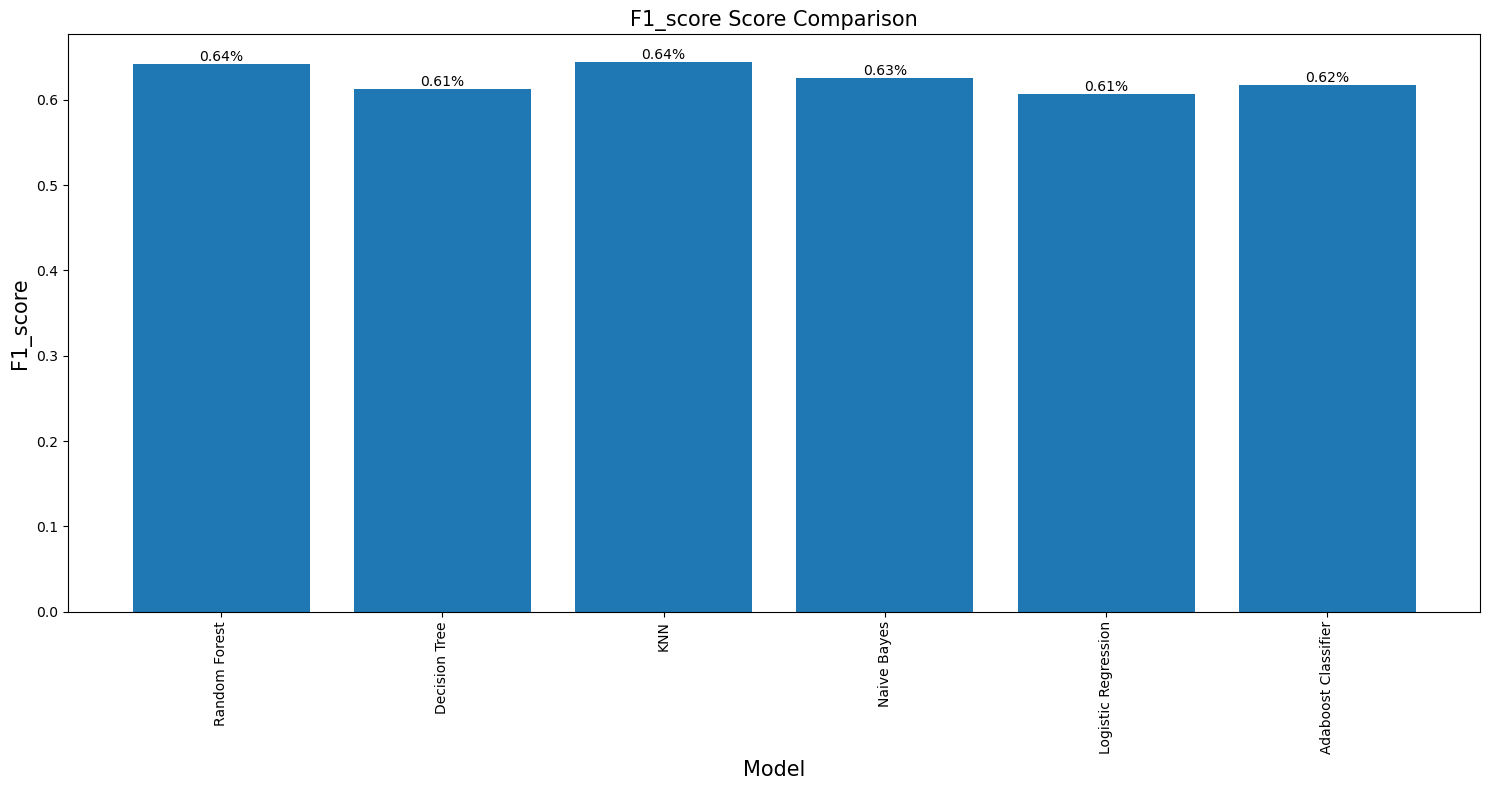

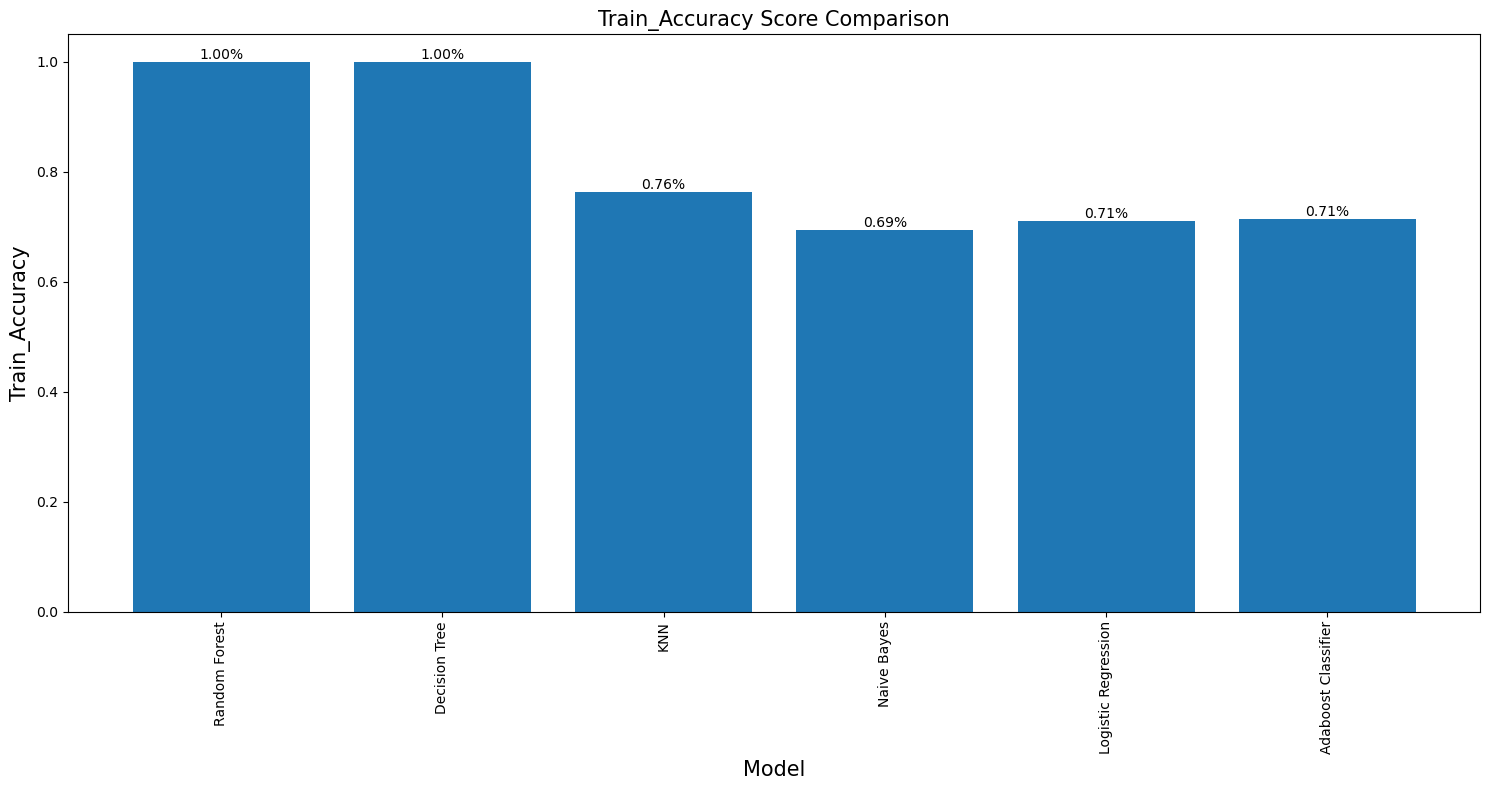

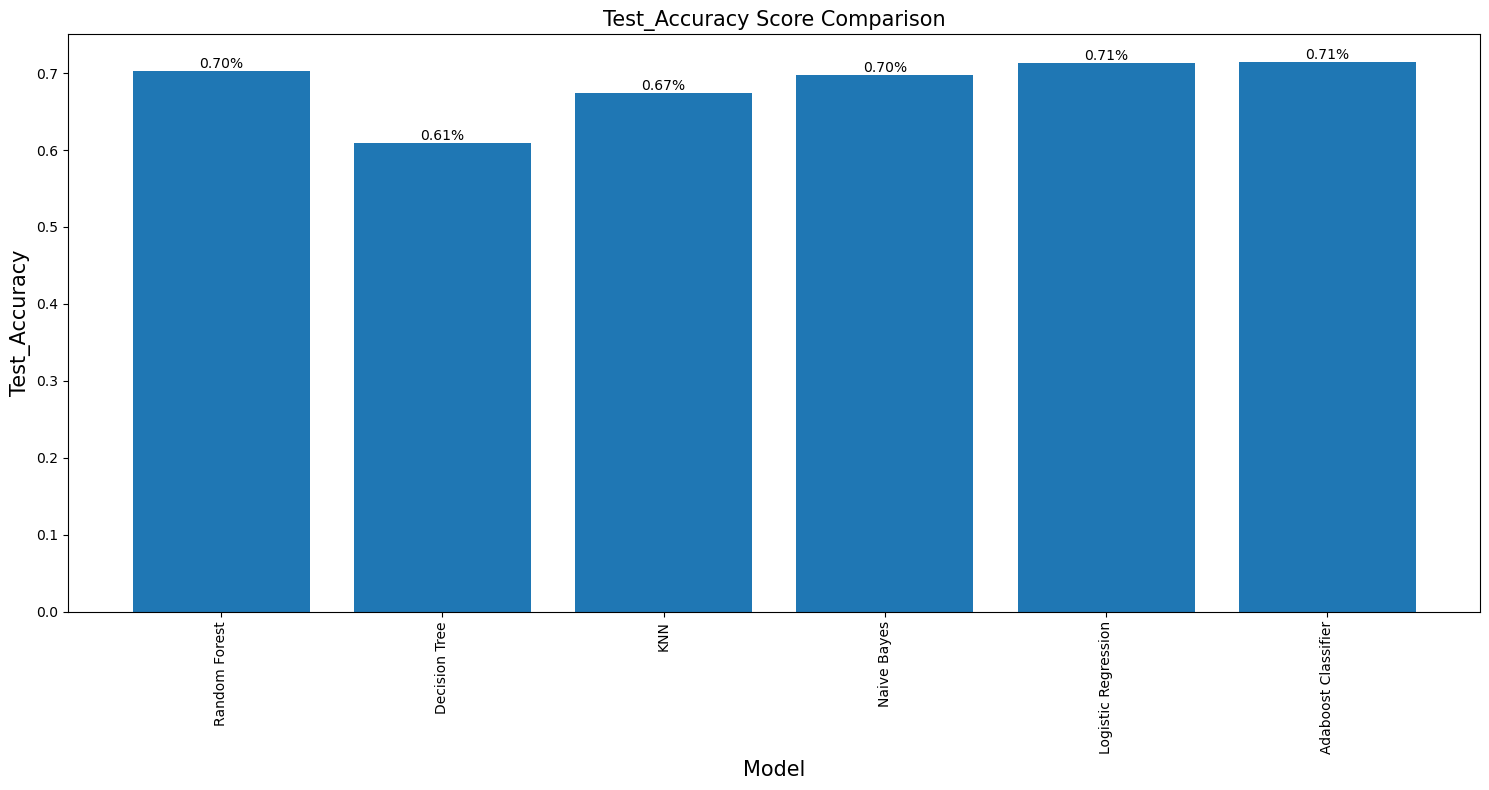

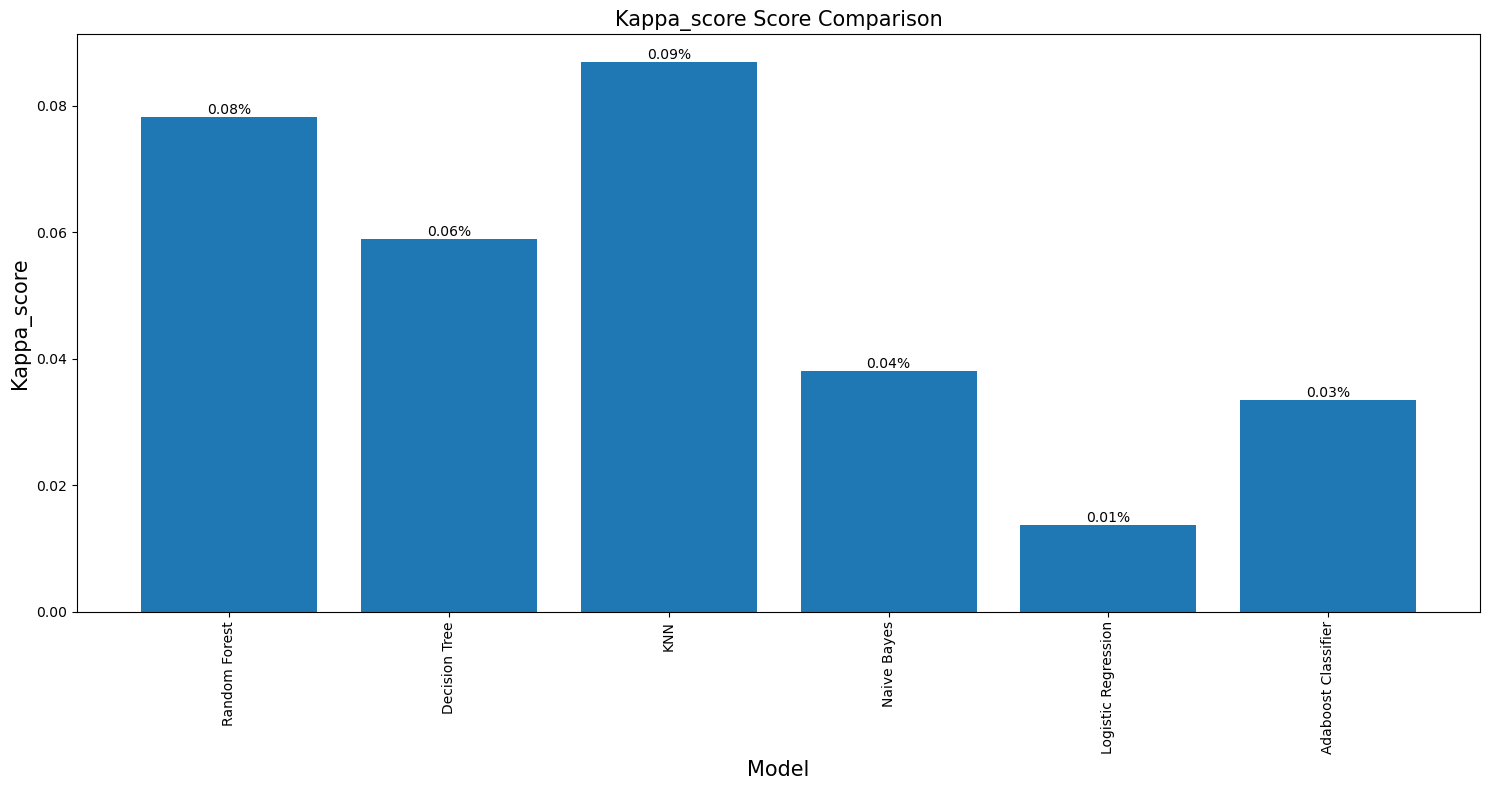

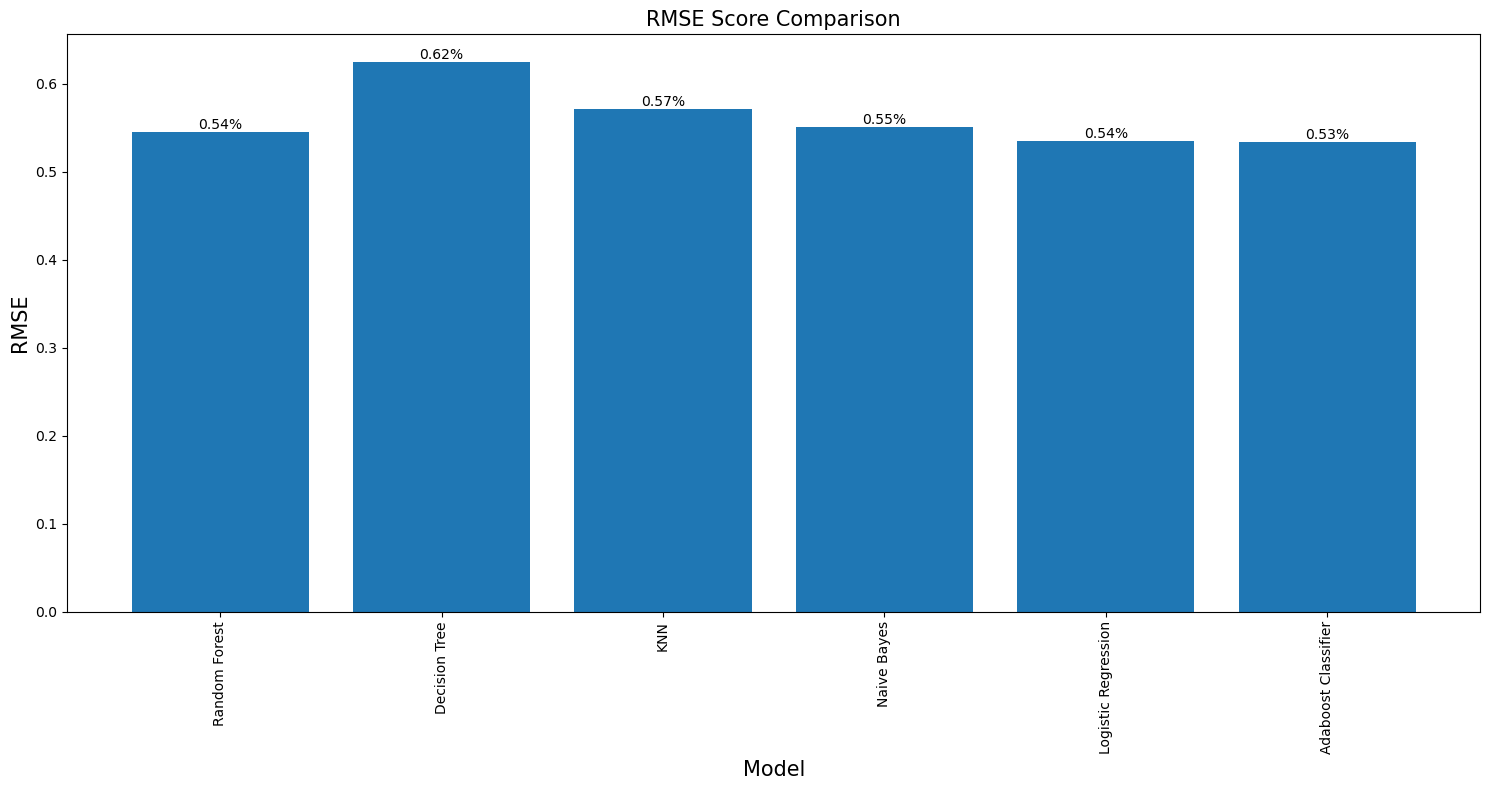

In [70]:
for j in scorecard.columns[1:]:
    plt.bar(scorecard['Model'], scorecard[j])
    for i, value in enumerate(scorecard[j]):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.xlabel('Model', fontsize = 15)
    plt.ylabel(j,fontsize = 15)
    plt.title(j + ' Score Comparison', fontsize = 15)

    plt.tight_layout()
    plt.show()

### Bias Variance Tradeoff

In [72]:
models1 = []
models1.append(('Decision Tree', DecisionTreeClassifier()))
models1.append(('KNN', KNeighborsClassifier()))
models1.append(('Naive Bayes', GaussianNB()))
models1.append(('Logistic Regression', LogisticRegression()))
models1.append(('Adaboost Classifier', AdaBoostClassifier()))
models1.append(('Random Forest', RandomForestClassifier()))

In [73]:
results = []
names = []
for name, model in models1:
    kfold = KFold(shuffle=True,n_splits=3,random_state=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s: Bias error: %f Variance error: (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))

Decision Tree: Bias error: 0.393771 Variance error: (0.003291)
KNN: Bias error: 0.365530 Variance error: (0.003533)
Naive Bayes: Bias error: 0.375459 Variance error: (0.002451)
Logistic Regression: Bias error: 0.400678 Variance error: (0.001554)
Adaboost Classifier: Bias error: 0.386023 Variance error: (0.002480)
Random Forest: Bias error: 0.363476 Variance error: (0.001592)


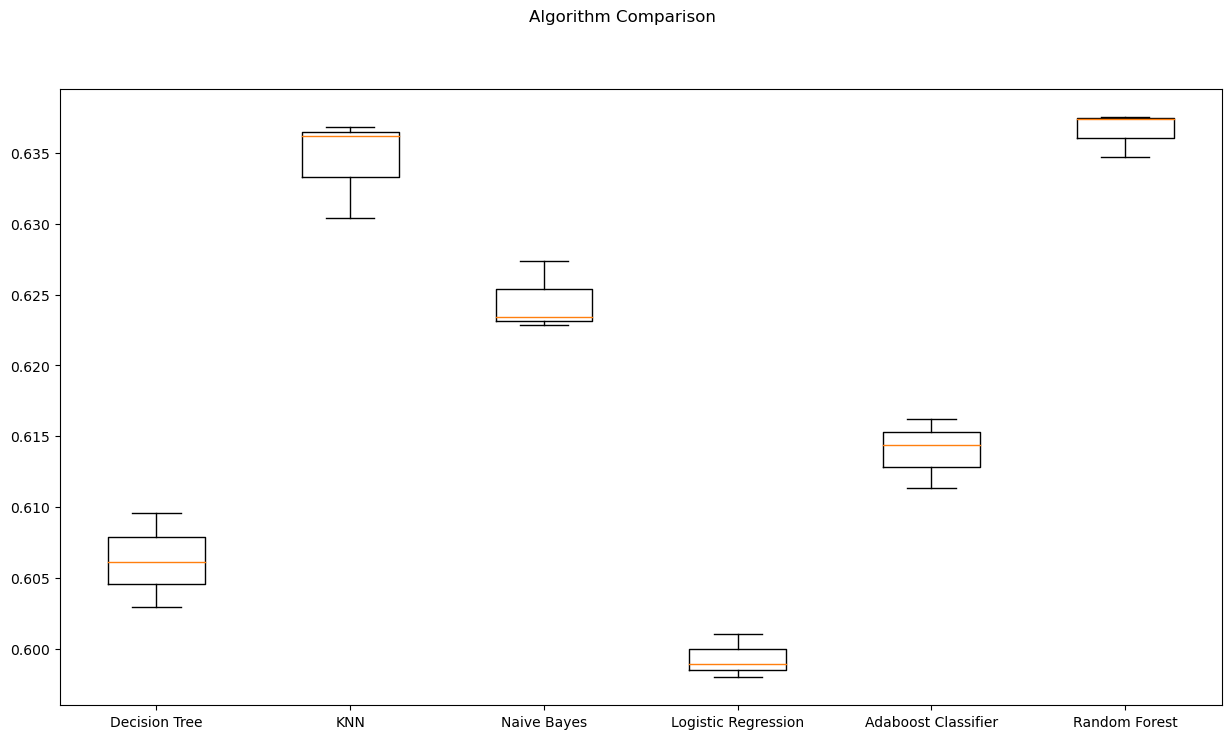

In [74]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()